# Chapter 2. 데이터 다루기

In [75]:
# 라이브러리 임포트
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

## 02-1 Training, Test
### 데이터 가져오기

In [53]:
df1 = pd.read_csv('/home/user/python_practice/mldl_practice/book_practice/Fish.csv')

In [5]:
df1.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [54]:
df1['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

### 머신러닝 실습용 데이터 추출

In [55]:
df1.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [38]:
df1_Bream = (
    df1.query("Species == 'Bream'").assign(Length = lambda x : x[['Length1', 'Length2', 'Length3']].mean(axis=1).round(1))
    [['Species', 'Weight', 'Length', 'Height', 'Width']]
)

In [39]:
df1_Smelt = (
    df1.query("Species == 'Smelt'").assign(Length = lambda x: x[['Length1', 'Length2', 'Length3']].mean(axis=1).round(1))
    [['Species', 'Weight', 'Length', 'Height', 'Width']]
)

#### 지난 내용 복습 - 이진 분류 모델용  Array 데이터 생성
- `pandas`를 이용하거나 직접 array를 생성 
- 아래와 같은 **array**나 **dataframe**형태로 데이터가 만들어지도록 data set 구축
    - dataframe 타입의 경우 feature들과 target이 각각 1차원 데이터인 arrary로 구성
```python
X = np.array([
    [5.1, 3.5, 1.4, 0.2],
    [4.9, 3.0, 1.4, 0.2],
    [6.2, 3.4, 5.4, 2.3],
    [5.9, 3.0, 5.1, 1.8],
    [6.7, 3.1, 4.4, 1.4],
    [5.6, 2.9, 3.6, 1.3]
])
y = np.array([0, 0, 1, 1, 1, 1])  # 0: setosa, 1: versicolor; 이진 분류 모델 기준
```

```python
df = pd.DataFrame({
    'feature1': [5.1, 4.9, 6.2, 5.9, 6.7, 5.6],
    'feature2': [3.5, 3.0, 3.4, 3.0, 3.1, 2.9],
    'feature3': [1.4, 1.4, 5.4, 5.1, 4.4, 3.6],
    'feature4': [0.2, 0.2, 2.3, 1.8, 1.4, 1.3],
    'target':   [0, 0, 1, 1, 1, 1]
})

X = df.drop('target', axis=1) # target 외 모든 feature들이 들어갈 때
y = df['target'] # 이진 분류모델 기준 두가지로만 분류
```

### 머신러닝 용 데이터 셋 생성 및 k-neighbors Classifier 객체 생성

In [46]:
# 교재의 `fish_data`는 x로 `fish_taret`는 y로 생성
x = pd.concat([df1_Bream[['Length', 'Weight']], df1_Smelt[['Length', 'Weight']]], ignore_index=True)

# 아래 코드는 오류 코드 - 칼럼 2개 데이터 생성됨
# y = pd.concat([df1_Bream[['Species']], df1_Smelt['Species']], ignore_index = True)


y = pd.concat(
    [df1_Bream['Species'], df1_Smelt['Species']], 
    ignore_index=True)

In [30]:
knc = KNeighborsClassifier()

### 인덱싱
- 교재 74-75페이지 해당

In [56]:
# print(x['Length'][4])
print(x[3:4])
print(x[0:5])
print(x[:5])
print(x[44:])

   Length  Weight
3    29.6   363.0
   Length  Weight
0    26.2   242.0
1    27.2   290.0
2    27.2   340.0
3    29.6   363.0
4    29.8   430.0
   Length  Weight
0    26.2   242.0
1    27.2   290.0
2    27.2   340.0
3    29.6   363.0
4    29.8   430.0
    Length  Weight
44    12.4    12.2
45    12.5    13.4
46    13.0    12.2
47    14.2    19.7
48    15.0    19.9


### 인덱싱 기능을 활용하여 훈련(트레이닝 셋), 테스트 세트 분류
- x, y 모두 35번째 까지는 훈련, 35번째 이후는 테스트 셋으로 분류

In [57]:
# 훈련 세트로 input값 중 0부터 34번째 인덱스까지 사용
x_train = x[:35]
# 훈련 세트로 target값 중 0부터 34번째 인덱스까지 사용 
y_train = y[:35]

# 테스트 세트로 input값 중 35번째 부터 마지막 인덱스 까지 사용
x_target = x[35:]
# 테스트 세트로 target값 중 35번째 부터 마지막 인덱스 까지 사용
y_target = y[35:]

### `fit()`, `score()`을 통해 훈련 및 모델 평가

In [58]:
knc.fit(x_train, y_train)
knc.score(x_target,y_target)

0.0

#### `score()`가 0이 나온 사유
- `Smelt` 데이터가 하나도 없음 
- 이진 분류 모델 기준 훈련 세트와 테스트 세트를 나누려면 각각의 2개 데이터가 균등하게 있어야함
- Sampling bias 없게 데이터 생성 필요

### 교재에서의 해결방안
- `Numpy` 사용

In [59]:
x_arr = np.array(x)
y_arr = np.array(y)

In [60]:
print(x_arr)

[[  26.2  242. ]
 [  27.2  290. ]
 [  27.2  340. ]
 [  29.6  363. ]
 [  29.8  430. ]
 [  30.4  450. ]
 [  30.3  500. ]
 [  30.9  390. ]
 [  30.9  450. ]
 [  31.8  500. ]
 [  31.9  475. ]
 [  32.   500. ]
 [  32.3  500. ]
 [  32.9  340. ]
 [  32.9  600. ]
 [  32.9  600. ]
 [  33.9  700. ]
 [  34.   700. ]
 [  34.3  610. ]
 [  34.4  650. ]
 [  34.9  575. ]
 [  34.9  685. ]
 [  35.2  620. ]
 [  35.8  680. ]
 [  35.8  700. ]
 [  35.9  725. ]
 [  35.9  720. ]
 [  36.7  714. ]
 [  36.8  850. ]
 [  37.7 1000. ]
 [  39.2  920. ]
 [  39.2  955. ]
 [  40.3  925. ]
 [  41.4  975. ]
 [  41.8  950. ]
 [  10.     6.7]
 [  10.7    7.5]
 [  10.8    7. ]
 [  11.1    9.7]
 [  11.4    9.8]
 [  11.6    8.7]
 [  12.1   10. ]
 [  12.1    9.9]
 [  12.2    9.8]
 [  12.4   12.2]
 [  12.5   13.4]
 [  13.    12.2]
 [  14.2   19.7]
 [  15.    19.9]]


In [61]:
# shape 확인
print(x_arr.shape)

(49, 2)


- 넘파이에서 무작위 결과를 만드는 함수들은 실행할 때마다 다른 결과를 만듦
- 일정한 결과를 얻으려면 `R`처럼 초기에 랜덤 시드random seedw 지정이 필요
- 책과 동일한 실습 결과를 얻을 수 있도록 랜덤 시드를 42로 지정

In [63]:
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

In [65]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [68]:
print(x_arr[[1, 3]])

[[ 27.2 290. ]
 [ 29.6 363. ]]


In [69]:
x_input = x_arr[index[:35]]
y_input = y_arr[index[:35]]

In [ ]:
# 데이터 제대로 나뉘었는지 확인
print(x_arr[13], x_input[0])

[ 32.9 340. ] [ 32.9 340. ]


In [72]:
x_test = x_arr[index[35:]]
y_test = y_arr[index[35:]]

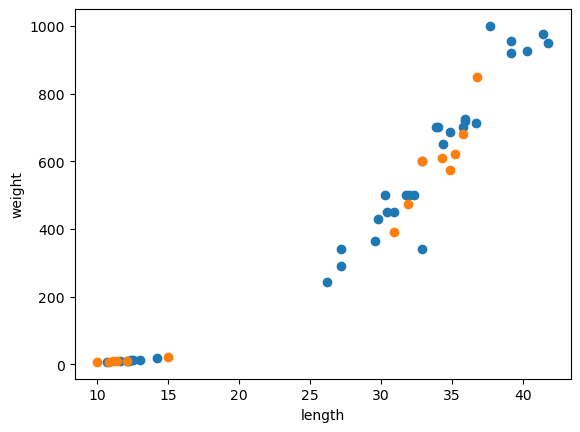

In [ ]:
# 제대로 섞였는지 scatter plot으로 확인

plt.scatter(x_input[:, 0], x_input[:, 1]) # 트레이닝 분포
plt.scatter(x_test[:, 0], x_test[:,1]) # 테스트 분포
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [78]:
# 나눈 데이터셋을 통한 모델 객체 재학습
knc.fit(x_input, y_input)

KNeighborsClassifier()

In [ ]:
# 모델 평가 1
knc.score(x_test, y_test)

1.0

In [82]:
knc.predict(x_test)

array(['Smelt', 'Smelt', 'Bream', 'Smelt', 'Bream', 'Bream', 'Bream',
       'Smelt', 'Bream', 'Bream', 'Smelt', 'Bream', 'Bream', 'Smelt'],
      dtype=object)

In [83]:
print(y_test)

['Smelt' 'Smelt' 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream'
 'Bream' 'Smelt' 'Bream' 'Bream' 'Smelt']


## 02-2 데이터 전처리
- `sklearn`의 `train_test_split` 모듈을 이용하여 데이터 전처리

### 데이터 전처리 시 어떤 데이터 타입을 사용해야하는가

| 항목                                          | pandas DataFrame 사용                 | numpy ndarray 사용   |
| ------------------------------------------- | ----------------------------------- | ------------------ |
| **메모리 효율**                                  | 낮음 (인덱스, dtype 관리로 오버헤드 존재)         | 높음 (순수 수치 배열 구조)   |
| **연산 속도**                                   | 약간 느림 (라벨 처리 및 타입 변환 발생)            | 빠름 (C 레벨의 벡터 연산)   |
| **호환성 (Scikit-Learn, TensorFlow, PyTorch)** | 내부적으로 `values` 또는 `to_numpy()`로 변환됨 | 그대로 사용 가능          |
| **가독성/유연성**                                 | 높음 (컬럼명 접근, 필터링, groupby 등 편리)      | 낮음 (인덱스 기반 접근만 가능) |
| **데이터 전처리**                                 | 매우 편리 (문자열, 날짜, 결측치 처리 강점)          | 불편 (순수 수치 연산만 강점)  |


- 결론 : 메모리, 처리면에 있어 numpy array 최대한 사용
- https://chatgpt.com/share/68f76009-925c-8000-91f7-c45fc802142d
- 상기 내용에 따라 해당 데이터의 실습의 경우에도 `ndarray` 데이터 타입을 이용

In [170]:
# x_input2, y_input2, x_test2, y_test2 = train_test_split(x_arr, y_arr, random_state=42) -> stratify 옵션 안넣고 플롯 및 결과 확인하기
# x_input2, y_input2, x_test2, y_test2 = train_test_split(x_arr, y_arr, stratify = y_arr, random_state=42) -> X train test, Y Train test 순으로 입력되어야함
x_input2, x_test2, y_input2, y_test2 = train_test_split(x_arr, y_arr, stratify = y_arr, random_state=42) 

In [171]:
print(x_input2.shape, y_input2.shape)
print(x_test2.shape, y_test2.shape)

(36, 2) (36,)
(13, 2) (13,)


In [172]:
print(y_test2)

['Bream' 'Bream' 'Bream' 'Smelt' 'Smelt' 'Bream' 'Smelt' 'Bream' 'Smelt'
 'Bream' 'Bream' 'Bream' 'Bream']


### 도미 데이터가 방어로 분류됨
- 하기의 `length`, `weight`가 각각 25, 150인 데이터는 빙어인데
- 모델을 돌려보면 도미로 나옴

In [173]:
# 다음 코드 따라 모델 재학습 하지 않으면 교재와 다른 결과 나오니 참고
knc = KNeighborsClassifier()
knc.fit(x_input2, y_input2)
knc.score(x_test2, y_test2)

1.0

In [174]:
knc.predict([[25, 150]])

array(['Smelt'], dtype=object)

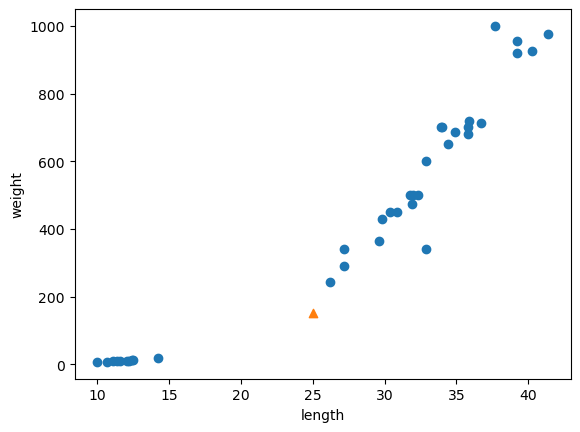

In [165]:
# Scatter plot 
plt.scatter(x_input2[:,0], x_input2[:,1]) # 트레이닝 데이터 표시
plt.scatter(25, 150, marker='^') # 위에 그 이상한 놈 
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 상기 그림에 따라 세모 부분이 분류가 애매하게 될 수 있음을 확인

In [188]:
distance, indexes = knc.kneighbors([[25, 150]])
print(distance.shape)
print(indexes.shape)

(1, 5)
(1, 5)


Text(0, 0.5, 'weight')

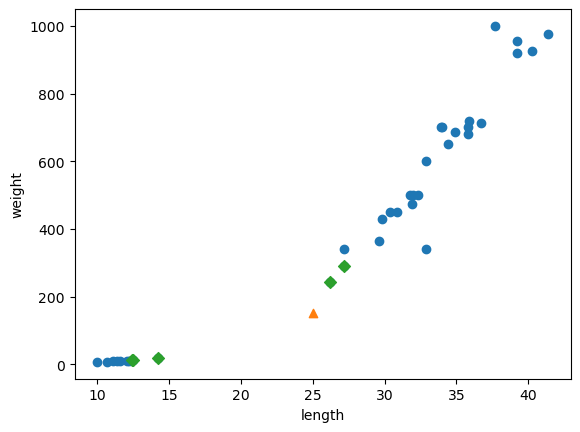

In [176]:
# indexes 객체를 통해 이웃 샘플을 따로 구별
plt.scatter(x_input2[:,0], x_input2[:,1])
plt.scatter(25, 150, marker = '^')
plt.scatter(x_input2[indexes, 0], x_input2[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')

- 교재와 다르게 플롯이 찍혔음
- 하기 코드에 따라 확인해도 동일한 결과
- **스터디 원들 통해서 플롯 결과 확인 필요**

- 혹시 Y(종속변수)를 그냥 문자열로 둬서 그런게 아닐까.. -> `train_test_split` **진행할 때에 Stratify 매개변수를 까먹음**
- 더불어서 재 분류된 테스트 데이터를 통해 학습을 진행하지 않음 

In [191]:
print(x_input2[indexes])
print(y_input2[indexes])
print(distance)

[[[ 26.2 242. ]
  [ 14.2  19.7]
  [ 12.5  13.4]
  [ 12.4  12.2]
  [ 27.2 290. ]]]
[['Bream' 'Smelt' 'Smelt' 'Smelt' 'Bream']]
[[ 92.00782575 130.7468164  137.17073303 138.37485321 140.01728465]]


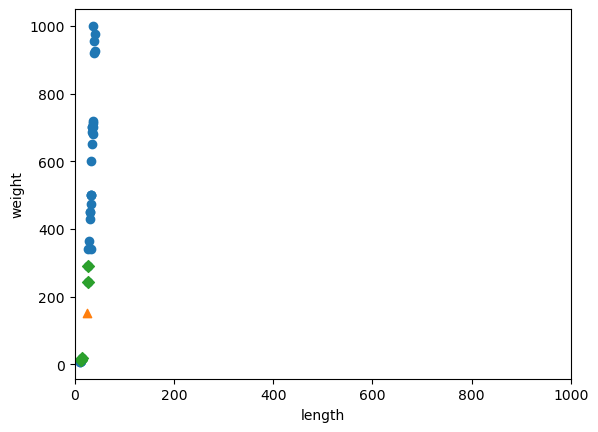

In [192]:
# Scale을 고려한 plot 생성
plt.scatter(x_input2[:,0], x_input2[:,1])
plt.scatter(25, 150, marker = '^')
plt.scatter(x_input2[indexes, 0], x_input2[indexes, 1], marker='D')
plt.xlim((0,1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 상기 플롯과 같이 알고리즘이 거리 기반일 경우 `Scatter plot`을 통해 데이터의 분포를 볼 때 단위를 잘 보아야함
- k-최근접 이웃 역시 데이터들의 벡터값을 기반하여 샘플 간의 거리를 통해 분류, 유사도를 판별
- 제대로 사용하려면 특성값을 일정한 기준으로 맞춰 주어야 합니다. 

- 이에 데이터 전처리 과정이 반드시 필요함

### 데이터 전처리 방법 - Standard score(z-score)
- 표준점수는 각 특성값이 평균에서 표준편차의 몇 배 만큼 떨어져 있는지 확인
- 데이터를 표준점수로 변환하는 과정을 표준화(standardization) 라고 부릅니다
#### 식
$분산 = \sqrt{\frac{\sum(각데이터값 - (데이터의 평균))^2}{데이터총갯수}}$

In [193]:
# 평균, 표준편차 계산
mean1 = np.mean(x_input2, axis=0)
std1 = np.std(x_input2, axis=0)

In [195]:
print(mean1, std1)
x_input2_scaled = (x_input2 - mean1) / std1

[ 27.56944444 441.98333333] [ 10.34794181 325.61300692]


- 훈련 세트를 mean（평균）으로 빼고 std（표준편차）로 나누어 주었기 때문에 값의 범위가 크게 달라짐에 따라 
- 샘플 [25, 150]을 동일한 비율로 변환하는 것이 필요

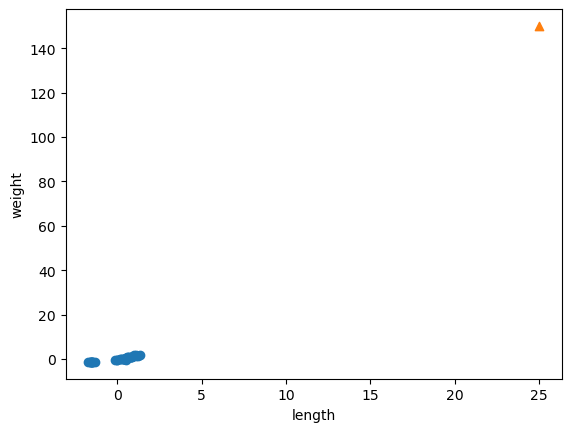

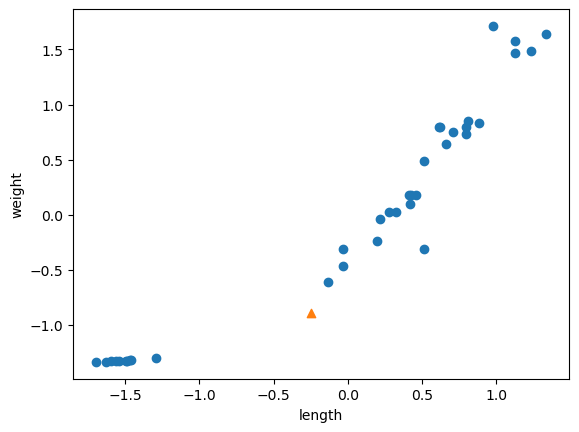

In [204]:
# 변환하기 전
plt.scatter(x_input2_scaled[:,0], x_input2_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 변환한 후
scaled = ([25, 150] - mean1)/std1
plt.scatter(x_input2_scaled[:,0], x_input2_scaled[:,1])
plt.scatter(scaled[0], scaled[1], marker='^')
# plt.scatter((25-mean1)/std1, (150-mean1)/std1, marker='^') -> 왜 안되는지 확인 필요
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [202]:
# 재훈련 및 평가
knc.fit(x_input2_scaled, y_input2)
x_test2_scaled = (x_test2 - mean1) / std1
knc.score(x_test2_scaled, y_test2)

1.0

In [203]:
print(knc.predict([scaled]))

['Bream']


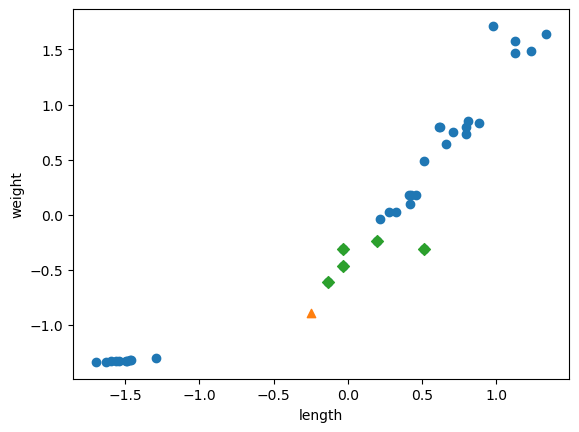

In [205]:
distance, indexes = knc.kneighbors([scaled])
plt.scatter(x_input2_scaled[:,0], x_input2_scaled[:,1])
plt.scatter(scaled[0], scaled[1], marker='^')
plt.scatter(x_input2_scaled[indexes,0], x_input2_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

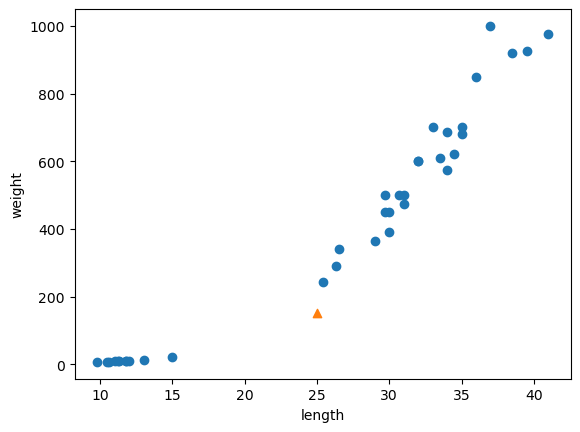

Text(0, 0.5, 'weight')

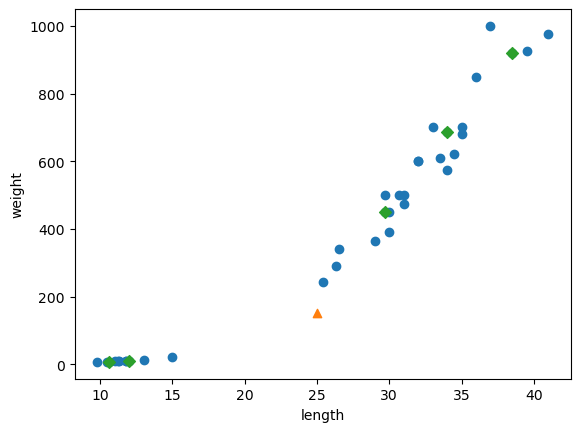

In [ ]:
# Apendix 플롯 결과가 다름에 따라 책 내용 대로 재현

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
fish_data = np.column_stack((fish_length, fish_weight))
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)


from sklearn.neighbors import KNeighborsClassifier 
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)


import matplotlib.pyplot as pit
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^') 
pit.xlabel('length')
plt.ylabel('weight')
plt.show()


plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length') 
plt.ylabel('weight')